# **Polynomial Regression**

## Importing the libraries

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

## Importing the dataset

In [91]:
dataset = pd.read_csv('Loan_Dataset.csv')
X = dataset.iloc[:, 1:-2].values 
y = dataset.iloc[:, -2].values

In [92]:
dataset

,Loan_ID,Gender,Age,Married,No_Of_Dependents,Edu_Qualification,Employment_Status,Applicant_Annual_Income,Co_Applicant_Annual_Income,Applicant_Credit_History,Credit_Rating,Existing_No_of_Loans,Loan_Amount_Availed,Car Purchased
0,55769,M,59,No,1,Graduate,Priv Sector,2314491,219621,571,Average,1,23144.92,Hyundai i10
1,13302,M,57,No,1,Graduate,Agriculturist,1074953,0,770,Excellent,1,107495.38,Hyundai i10
2,23921,F,37,Yes,2,Not Graduate,Not-Employed,2232122,1095821,560,Average,1,223212.23,Tata Indigo
3,86901,M,32,No,3,Not Graduate,Agriculturist,1598704,0,774,Excellent,0,559546.46,Mahinddra Bolero
4,94393,F,61,Yes,2,Not Graduate,Agriculturist,1719946,0,759,Excellent,0,429986.55,Hyundai i10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,41138,F,48,No,3,Graduate,Not-Employed,1980231,790447,656,Good,0,297034.74,Maruti Suzuki Desire
996,92291,F,59,Yes,3,Not Graduate,Agriculturist,2071673,0,762,Excellent,0,517918.44,Tata Indigo
997,73340,F,18,Yes,3,Not Graduate,Not-Employed,1498143,1255224,540,Poor,1,0.00,No Vehicle
998,65542,M,24,No,3,Not Graduate,Self-Employed,811224,863150,551,Average,1,121683.66,Tata Indigo


In [93]:
print(X)

[['M' 59 'No' ... 571 'Average' 1]
 ['M' 57 'No' ... 770 'Excellent' 1]
 ['F' 37 'Yes' ... 560 'Average' 1]
 ...
 ['F' 18 'Yes' ... 540 'Poor' 1]
 ['M' 24 'No' ... 551 'Average' 1]
 ['F' 34 'No' ... 558 'Average' 0]]


In [95]:
print(X[0])

['M' 59 'No' 1 'Graduate' 'Priv Sector' 2314491 219621 571 'Average' 1]


In [96]:
print(y)

[  23144.92  107495.38  223212.23  559546.46  429986.55  129865.43
   87561.88  136702.6   116183.25  647466.88  152996.73       0.
   37606.86  181470.09    8058.38  547153.28   18503.51  106670.63
  575037.31  109780.98       0.    143965.55       0.    218262.5
  441485.1    39491.33  260041.43  191486.58       0.         0.
  184669.06  205622.37  101314.8  1132340.02  530346.15  281072.26
  412244.47  564017.91  435218.43  859867.89  831390.48  899595.9
  388020.35       0.    208675.16  197274.47  200620.26       0.
  148792.72       0.    320717.94  188868.08  104773.69  228392.41
       0.         0.    305485.04       0.    483029.16  148872.14
       0.   1139035.59  196612.56  535650.28  218833.49  867834.22
  772898.02  172468.23  313530.15  225577.95       0.     80331.11
       0.    870373.28  354380.99   37741.88       0.     21117.56
       0.    475136.36  295505.85   93044.55       0.     44414.7
  449877.27       0.    295068.39  552528.85  303569.76  726705.63
  50

In [97]:
print(y[0])

23144.92


## Encoding categorical data

In [98]:
# ['M' 59 'No' 1 'Graduate' 'Priv Sector' 2314491 219621 571 'Average' 1]

ct = ColumnTransformer(
    [
        ("scaling", StandardScaler(), [1, 3, 6, 7, 8, 10]),
        ("onehot", OneHotEncoder(sparse=False), [0, 2, 4, 5, 9]),
    ]
)

X = np.array(ct.fit_transform(X))

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [99]:
print(X)

[[ 1.28 -0.48  0.42 ...  0.    0.    0.  ]
 [ 1.14 -0.48 -0.69 ...  1.    0.    0.  ]
 [-0.31  0.43  0.35 ...  0.    0.    0.  ]
 ...
 [-1.69  1.33 -0.31 ...  0.    0.    1.  ]
 [-1.25  1.33 -0.92 ...  0.    0.    0.  ]
 [-0.53 -1.38 -0.08 ...  0.    0.    0.  ]]


In [100]:
print(X[0])

[ 1.28 -0.48  0.42 -0.63 -1.09  0.99  0.    1.    1.    0.    1.    0.
  0.    0.    0.    1.    0.    0.    1.    0.    0.    0.  ]


## Splitting the dataset into the Training set and Test set

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Polynomial Regression model on the Training set

In [102]:
# Fit a polynomial regression model to the training data
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

## Predicting the Test set results

In [103]:
X_test_poly = poly_features.transform(X_test)
y_pred = poly_model.predict(X_test_poly)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 644450.25  719676.46]
 [  19938.25       0.  ]
 [ 131570.25  120031.13]
 [ 105090.25  107813.25]
 [ -22589.75       0.  ]
 [ 541570.25  522939.45]
 [ 222370.25  191486.58]
 [ 207570.25  201265.26]
 [ 412130.25  409407.33]
 [  32706.25       0.  ]
 [ 473346.25  510588.08]
 [ 631266.25  609933.06]
 [ 281698.25  284024.39]
 [ 452514.25  433425.32]
 [  12626.25       0.  ]
 [ -28381.75       0.  ]
 [ 328946.25  324512.48]
 [ -72797.75       0.  ]
 [  -1501.75    8058.38]
 [   7842.25   21117.56]
 [ 246978.25  205622.37]
 [  59426.25   16880.53]
 [  79458.25   89481.68]
 [ 257714.25  213403.38]
 [ 542866.25  510356.04]
 [ 229634.25  239438.94]
 [ 233298.25  197274.47]
 [ 268066.25  277723.22]
 [ -88221.75       0.  ]
 [  99330.25  107495.38]
 [ 144130.25   94723.93]
 [ 388386.25  377721.02]
 [ 313618.25  315485.  ]
 [ 197866.25  194775.47]
 [ -14253.75   21207.45]
 [ 182546.25  219240.79]
 [ 262322.25  315526.3 ]
 [ 607986.25  557193.72]
 [  64290.25   82893.94]
 [ 628538.25  514148.56]


## Evaluating the performance of the model


To calculate the accuracy of a polynomial regression model, you can use the R-squared (coefficient of determination) metric. R-squared is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, with higher values indicating a better fit of the model to the data.

In [104]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² score:", r2)

RMSE: 46291.79683239393
R² score: 0.9703013316360823


## Plot the predicted vs actual values

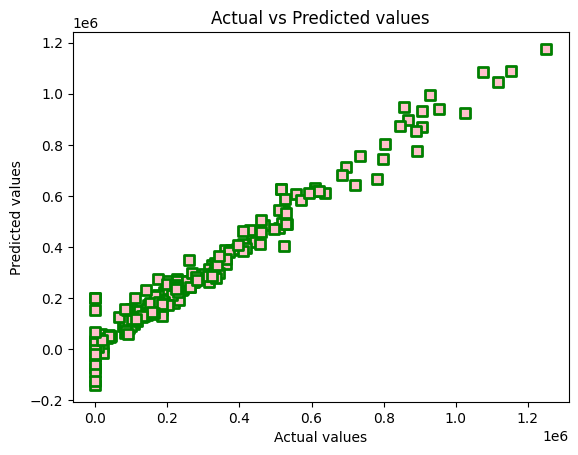

In [105]:
plt.scatter(y_test, y_pred, c ="pink",
            linewidths = 2,
            marker ="s",
            edgecolor ="green",
            s = 50)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.show()

## Demo

In [107]:
new_user_data = np.array([
    ['M', 32, 'No', 1, 'Not Graduate', 'Agriculturist', 1159941, 0, 853, 'Excellent', 1]
])

new_user_data = ct.transform(new_user_data)
new_user_data_poly = poly_features.transform(new_user_data)
new_user_loan_amount = poly_model.predict(new_user_data_poly)

# Printing the predicted loan amount
print("Predicted loan amount for the new user:", new_user_loan_amount[0])


Predicted loan amount for the new user: 243442.25
